# Logistic Regression for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [10]:
%store -r data
%store -r data_test

In [11]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [12]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       1752 non-null   float64       
 6   city_name                1752 non-null   object        
 7   tem

In [13]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = True
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [14]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [15]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


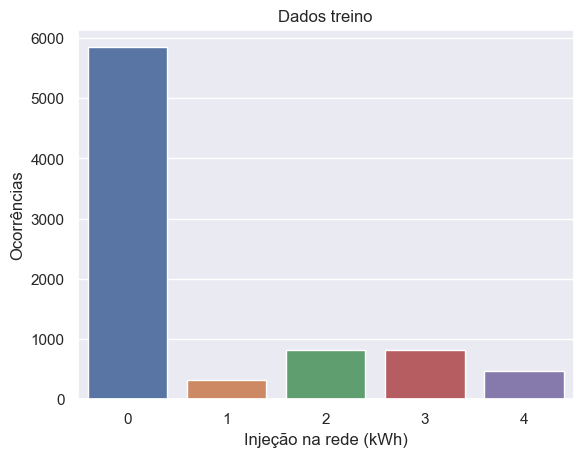

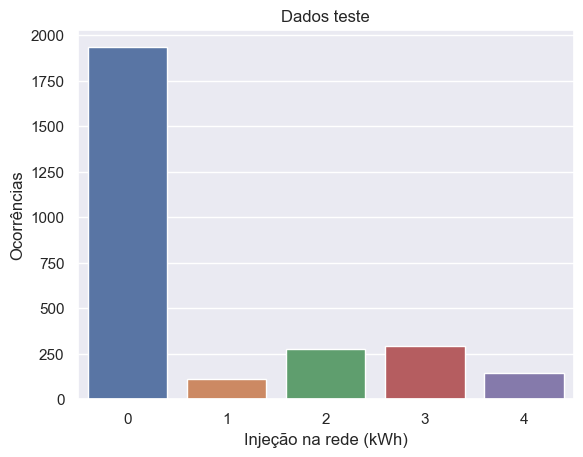

In [16]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [18]:
logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=2022, solver='newton-cg')


LogisticRegression(random_state=2022, solver='newton-cg')

In [19]:
predictions1 = logmodel1.predict(X_test)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs', max_iter=10000)
print(logmodel2)
logmodel2.fit(X_train_scaled,y_train.values.ravel())

LogisticRegression(max_iter=10000, random_state=2022)


LogisticRegression(max_iter=10000, random_state=2022)

In [21]:
predictions2 = logmodel2.predict(X_test_scaled)

In [22]:
logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=2022, solver='liblinear')


LogisticRegression(random_state=2022, solver='liblinear')

In [23]:
predictions3 = logmodel3.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [25]:
print("With 'newton-cg': \n", classification_report(y_test,predictions1, zero_division=1))
print("With 'lbfgs': \n", classification_report(y_test,predictions2, zero_division=1))
print("With 'liblinear': \n", classification_report(y_test,predictions3, zero_division=1))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1933
           1       0.00      0.00      0.00       110
           2       0.47      0.54      0.50       276
           3       0.51      0.58      0.54       292
           4       0.51      0.42      0.46       143

    accuracy                           0.83      2754
   macro avg       0.49      0.51      0.50      2754
weighted avg       0.80      0.83      0.81      2754

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1933
           1       0.00      0.00      0.00       110
           2       0.48      0.56      0.52       276
           3       0.51      0.57      0.54       292
           4       0.53      0.50      0.52       143

    accuracy                           0.83      2754
   macro avg       0.50      0.52      0.51      2754
weighted avg       0.81      0.83      0.

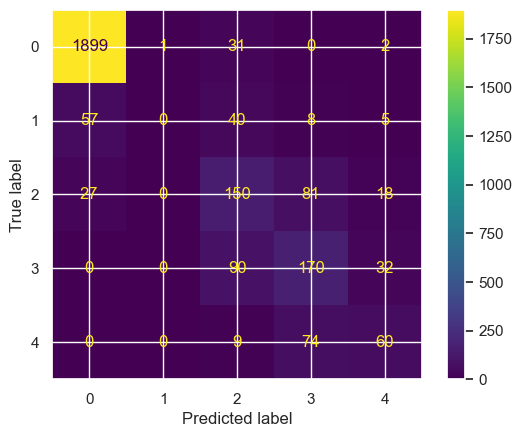

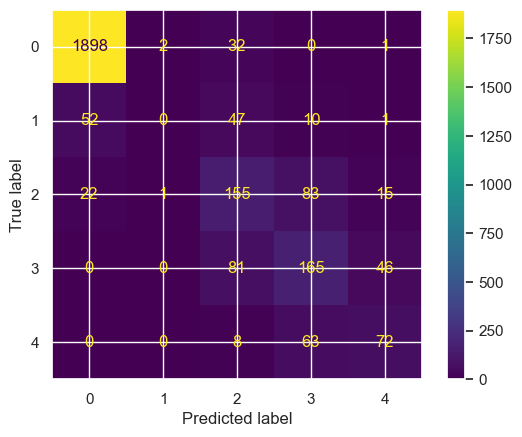

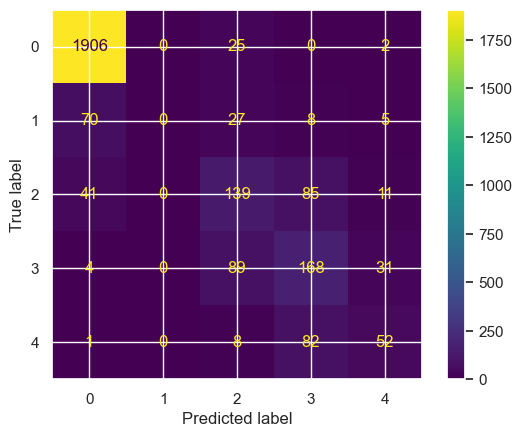

In [26]:
#Get the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,predictions1)
ConfusionMatrixDisplay.from_predictions(y_test,predictions2)
ConfusionMatrixDisplay.from_predictions(y_test,predictions3)
plt.show()